In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks/healthcare analytics

/content/drive/My Drive/Colab Notebooks/healthcare analytics


In [3]:
!ls

 Anisha_score.csv	    MH_Predict_cost.ipynb
 CKD.ipynb		    PatientPortalAnalysis.pptx
 Data_MH.csv		    PatientPortalUsage.ipynb
 Dataset.csv		    ProstrateCancer.ipynb
 Final_file.csv		    purchase_fre_job.png
 FinalRaw.csv		   'Survival Analysis ProstrateCancer.ipynb'
 final_score.csv	    sympotms.csv
 Final_Tenure1.csv	    sympotms.gsheet
 Final_Tenure1.gsheet	    sympotms.xlsx
 Final_Tenure.csv	    tenure.csv
 hints5_cycle2_public.csv   TimeSeries.ipynb
 inbetween.csv		    training_data.csv
 inbetween.gsheet	    Webscrapper_zocdoc.ipynb


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Read File

In [66]:
df = pd.read_csv('Data_MH.csv')
df

,SL.,AGE,FEMALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL COST TO HOSPITAL,Ln_Total Cost,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT,COST OF IMPLANT
0,1,58.0,0,0,0,0,0,0,0,0,...,0,1,0,660293.0,13.400439,25,12,13,1,38000
1,2,59.0,0,0,0,1,0,0,0,0,...,0,1,0,809130.0,13.603715,41,20,21,1,39690
2,3,82.0,0,0,0,0,0,1,0,0,...,0,1,1,362231.0,12.800037,18,9,9,0,0
3,4,46.0,0,0,0,1,0,0,0,0,...,0,1,0,629990.0,13.353459,14,13,1,1,89450
4,5,60.0,0,0,0,1,0,0,0,0,...,0,1,0,444876.0,13.005551,24,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,0,0,0,0,0,0,0,0,...,0,1,1,295155.0,12.595256,10,3,7,1,35000
244,245,58.0,0,0,0,0,0,1,0,0,...,0,1,1,200321.0,12.207676,11,2,9,1,26000
245,246,44.0,0,0,0,0,0,1,0,0,...,0,1,1,191188.0,12.161013,13,5,8,0,0
246,247,60.0,0,0,0,0,0,0,0,0,...,0,1,0,202807.0,12.220010,9,6,3,0,0


In [67]:
df.drop(['SL.','TOTAL COST TO HOSPITAL '], axis = 1, inplace = True)

In [30]:
df.dtypes
df.columns

Index(['AGE', 'FEMALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BMI = KG/(height/100)', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'WALKED IN', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Ln_Total Cost',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70f4171890>,
      dtype=object)

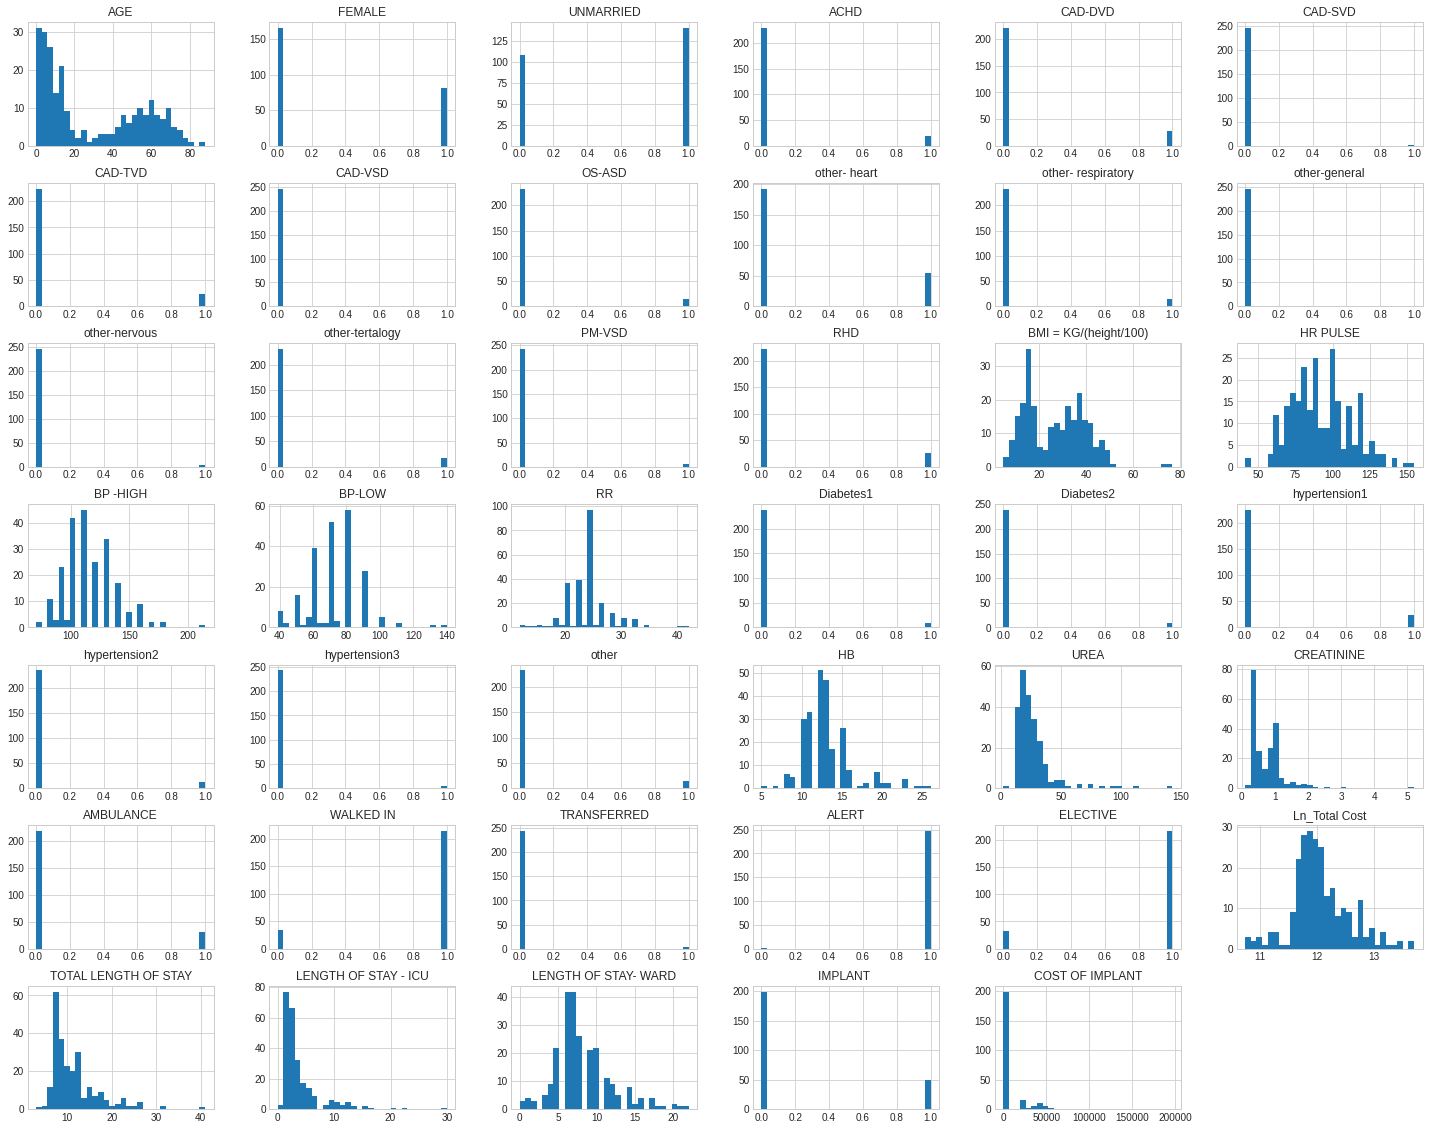

In [31]:
#Check for normal distribution
df.hist(bins = 30, figsize= (25,20))

**Linear regression analysis has four key assumptions. These are:**


We are investigating a linear relationship

All variables follow a normal distribution

There is very little or no multicollinearity


# Assumption 1: Investigate a Linear Relation between varaibles

In [32]:
df.columns

Index(['AGE', 'FEMALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BMI = KG/(height/100)', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'WALKED IN', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Ln_Total Cost',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.datasets import make_regression

In [74]:
df.rename(columns={'Ln_Total Cost': 'Tot_Cost'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
df.columns

Index(['AGE', 'FEMALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BMI = KG/(height/100)', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'WALKED IN', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Tot_Cost',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

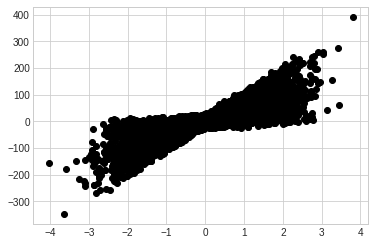

In [36]:
y1=df['Tot_Cost']
# for i in df.columns:
#   if i != 'Tot_Cost':
#     i, y1 = make_regression(n_samples=248, n_features=1, noise=10)
#     plt.plot(i, y1, 'o', color='black');

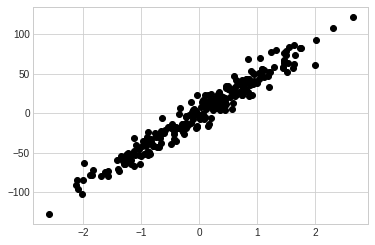

In [39]:

df['AGE'], y1 = make_regression(n_samples=248, n_features=1, noise=10)
plt.plot(df['AGE'], y1, 'o', color='black');

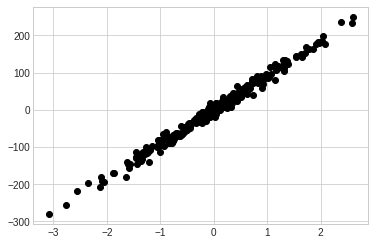

In [40]:
df['FEMALE'], y1 = make_regression(n_samples=248, n_features=1, noise=10)
plt.plot(df['FEMALE'], y1, 'o', color='black');

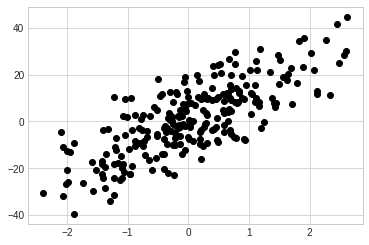

In [41]:
df['Diabetes 1'], y1 = make_regression(n_samples=248, n_features=1, noise=10)
plt.plot(df['Diabetes 1'], y1, 'o', color='black');

# Assumption 2 for Linear Model : Normal Distribution

The next assumption is that the variables follow a normal distribution. In order words, we want to make sure that for each x value, y is a random variable following a normal distribution and its mean lies on the regression line. To take a deeper dive into probability distributions with python you can read this article: Fitting Probability Distributions with Python 

One of the ways to visually test for this assumption is through the use of the Q-Q-Plot. Q-Q stands for Quantile-Quantile plot and is a technique to compare two probability distributions in a visual manner.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


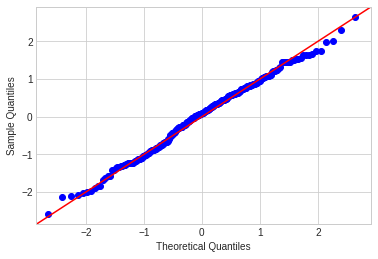

In [42]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(df['AGE'], line ='45')
py.show()

# Assumption 3 : No/little multicollinearity

The Mutual Information is a measure of the similarity between two labels of the same data.

Scikit-learn has two mutual information metrics in its feature_selection module: one for real-valued targets (mutual_info_regression) and one for categorical targets (mutual_info_classif). Our target, total cost, is real-valued. The next couple of cells computes the MI scores for our features and wraps them up in a dataframe.

Before doing MI Scores - all the features should have type int
Categorical Varaibles have already been converted with Dummy One Hot Key Encoding

In [69]:
df.columns

Index(['AGE', 'FEMALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BMI = KG/(height/100)', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'WALKED IN', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Ln_Total Cost',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

In [68]:
df.shape

(248, 41)

In [70]:
df = df.dropna(axis=0, how="any")

In [71]:
df.shape

(191, 41)

In [72]:
df.dtypes

AGE                      float64
FEMALE                     int64
UNMARRIED                  int64
ACHD                       int64
CAD-DVD                    int64
CAD-SVD                    int64
CAD-TVD                    int64
CAD-VSD                    int64
OS-ASD                     int64
other- heart               int64
other- respiratory         int64
other-general              int64
other-nervous              int64
other-tertalogy            int64
PM-VSD                     int64
RHD                        int64
BMI = KG/(height/100)    float64
HR PULSE                   int64
BP -HIGH                 float64
BP-LOW                   float64
RR                         int64
Diabetes1                  int64
Diabetes2                  int64
hypertension1              int64
hypertension2              int64
hypertension3              int64
other                      int64
HB                       float64
UREA                     float64
CREATININE               float64
AMBULANCE 

## For Mutual Score we need to convert float to int

In [76]:
X = df.copy()
y = X.pop("Tot_Cost")

In [77]:
for i in X.columns:
  X[i] = X[i].astype(int)

In [78]:
X.dtypes

AGE                      int64
FEMALE                   int64
UNMARRIED                int64
ACHD                     int64
CAD-DVD                  int64
CAD-SVD                  int64
CAD-TVD                  int64
CAD-VSD                  int64
OS-ASD                   int64
other- heart             int64
other- respiratory       int64
other-general            int64
other-nervous            int64
other-tertalogy          int64
PM-VSD                   int64
RHD                      int64
BMI = KG/(height/100)    int64
HR PULSE                 int64
BP -HIGH                 int64
BP-LOW                   int64
RR                       int64
Diabetes1                int64
Diabetes2                int64
hypertension1            int64
hypertension2            int64
hypertension3            int64
other                    int64
HB                       int64
UREA                     int64
CREATININE               int64
AMBULANCE                int64
WALKED IN                int64
TRANSFER

In [79]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [82]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)


In [81]:
mi_scores

LENGTH OF STAY - ICU     5.518550e-01
TOTAL LENGTH OF STAY     3.607589e-01
AGE                      2.262247e-01
COST OF IMPLANT          1.840441e-01
BMI = KG/(height/100)    1.590870e-01
HB                       1.438723e-01
UNMARRIED                1.333942e-01
IMPLANT                  1.294826e-01
LENGTH OF STAY- WARD     1.273275e-01
BP-LOW                   1.048264e-01
CREATININE               7.390008e-02
CAD-DVD                  6.415076e-02
other-tertalogy          6.284328e-02
HR PULSE                 6.235069e-02
CAD-TVD                  5.804148e-02
OS-ASD                   5.506622e-02
Diabetes2                4.151093e-02
RHD                      3.841240e-02
FEMALE                   3.545043e-02
other- heart             3.415523e-02
other                    3.002586e-02
hypertension1            2.708632e-02
UREA                     2.328718e-02
ELECTIVE                 1.989756e-02
AMBULANCE                1.924333e-02
RR                       1.746520e-02
ACHD        

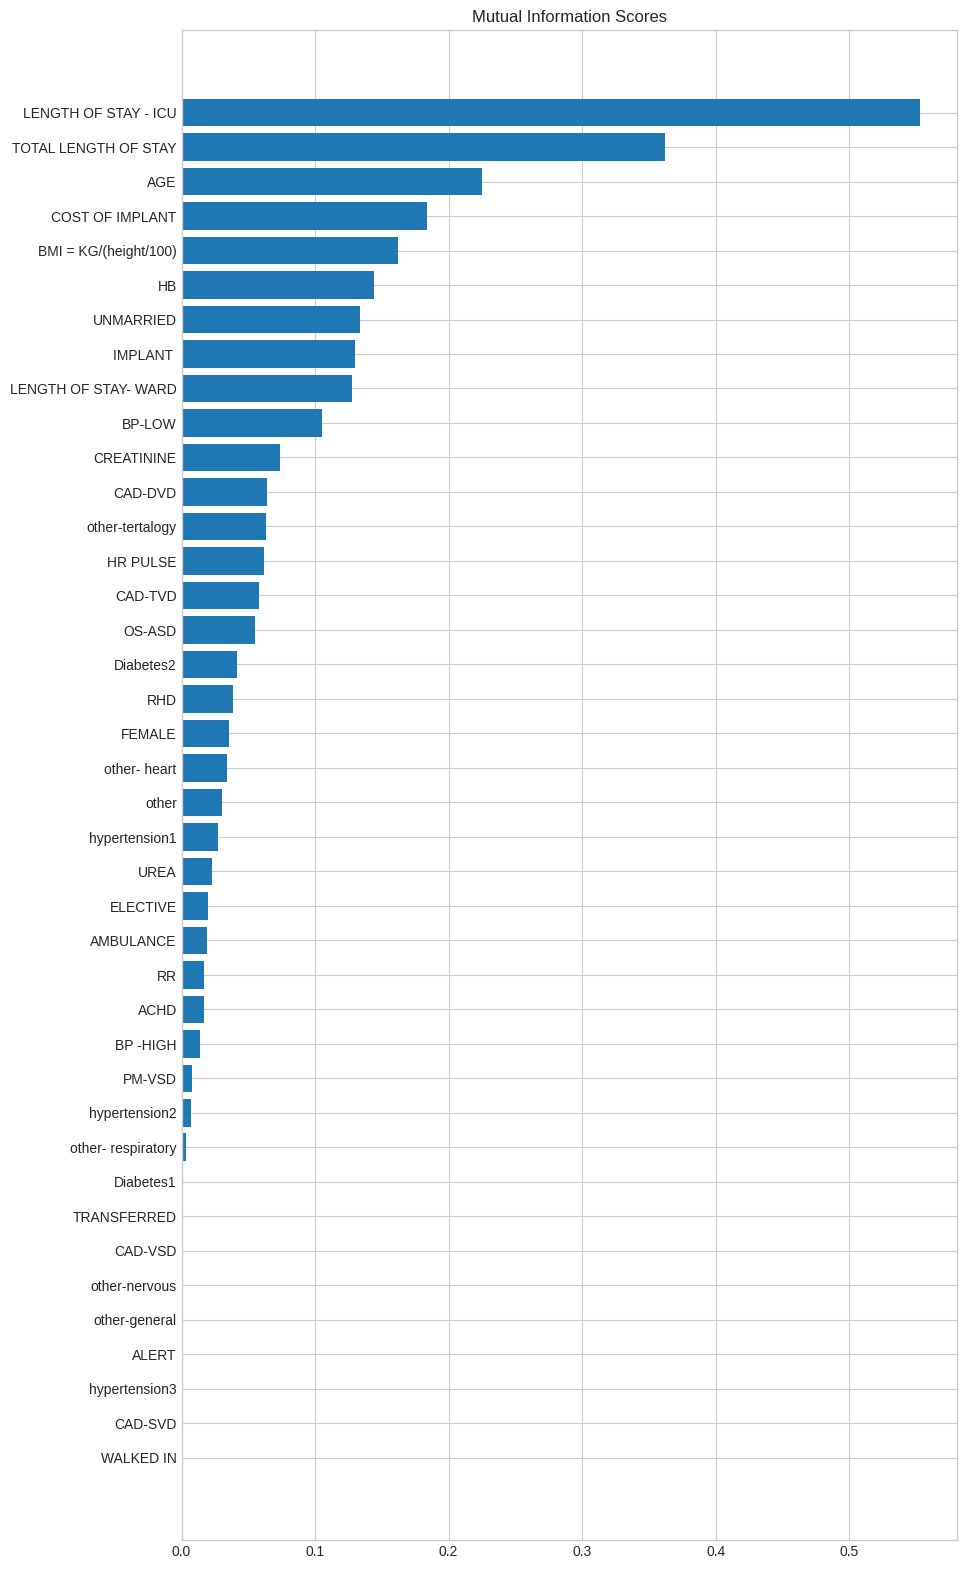

In [87]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 20))
plot_mi_scores(mi_scores)

In [ ]:
#Taking on the top 10 features where the MI Score is high

# Again upload the MH data and answer the questions

Answer 1 : a) Develop a simple linear regression model to check if there is an association between total cost and body weight? How will you interpret the regression coefficient for body weight?
(b) Is it OK to conclude that a patient weighing 51 kgs us likely to spend atleast 1000 INR (money units) than patient who weighs 50kgs (use 5% significance) 

In [92]:
!ls

 Anisha_score.csv	    MH_Predict_cost.ipynb
 CKD.ipynb		    PatientPortalAnalysis.pptx
 Data_MH.csv		    PatientPortalUsage.ipynb
 Dataset.csv		    ProstrateCancer.ipynb
 Final_file.csv		    purchase_fre_job.png
 FinalRaw.csv		   'Survival Analysis ProstrateCancer.ipynb'
 final_score.csv	    sympotms.csv
 Final_Tenure1.csv	    sympotms.gsheet
 Final_Tenure1.gsheet	    sympotms.xlsx
 Final_Tenure.csv	    tenure.csv
 hints5_cycle2_public.csv   TimeSeries.ipynb
 inbetween.csv		    training_data.csv
 inbetween.gsheet	    Webscrapper_zocdoc.ipynb
 MH_allData.csv


In [93]:
df1 = pd.read_csv('MH_allData.csv')
df1

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT,Unnamed: 51,Unnamed: 52
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,660293.0,13.400439,25,12,13,Y,1,38000,13.401829,0.0
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,809130.0,13.603715,41,20,21,Y,1,39690,13.605126,0.0
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,362231.0,12.800037,18,9,9,N,0,0,12.801365,0.0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,629990.0,13.353459,14,13,1,Y,1,89450,13.354844,0.0
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,444876.0,13.005551,24,12,12,N,0,0,13.006899,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,51.0,M,0,MARRIED,0,other- heart,0,0,0,...,295155.0,12.595256,10,3,7,Y,1,35000,12.596562,0.0
244,245,58.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,200321.0,12.207676,11,2,9,Y,1,26000,12.208942,0.0
245,246,44.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,191188.0,12.161013,13,5,8,N,0,0,12.162274,0.0
246,247,60.0,M,0,MARRIED,0,other- heart,0,0,0,...,202807.0,12.220010,9,6,3,N,0,0,12.221277,0.0


In [98]:
df1.rename(columns={'TOTAL COST TO HOSPITAL ': 'Total_C'}, inplace=True)

In [101]:
df1.rename(columns={'Ln(Total Cost)': 'Ln_Total_C'}, inplace=True)

In [132]:
df1.columns

Index(['SL.', 'AGE', 'GENDER', 'MALE', 'MARITAL STATUS', 'UNMARRIED',
       'KEY COMPLAINTS -CODE', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE AT THE TIME OF ARRIVAL', 'ALERT', 'TYPE OF ADMSN', 'ELECTIVE',
       'Total_C', 'Ln_Total_C', 'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU',
       'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)', 'IMPLANT',
       'COST OF IMPLANT', 'Unnamed: 51', 'Unnamed: 52'],
      dtype='object')

In [134]:
# Creating X and y
X1 = df1['BODY WEIGHT']
y1 = df1['Total_C']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train1)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train1, X_train_sm).fit()

# Printing the parameters
print(lr.params)

# Performing a summary to list out all the different parameters of the regression line fitted
print(lr.summary())

const          136097.050703
BODY WEIGHT      1786.631621
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Total_C   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     23.18
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.94e-06
Time:                        17:30:23   Log-Likelihood:                -2595.8
No. Observations:                 198   AIC:                             5196.
Df Residuals:                     196   BIC:                             5202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Final the Linear Equation from top 10 features

In [105]:
#original DF with transformations
df.columns

Index(['AGE', 'FEMALE', 'UNMARRIED', 'ACHD', 'CAD-DVD', 'CAD-SVD', 'CAD-TVD',
       'CAD-VSD', 'OS-ASD', 'other- heart', 'other- respiratory',
       'other-general', 'other-nervous', 'other-tertalogy', 'PM-VSD', 'RHD',
       'BMI = KG/(height/100)', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
       'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
       'WALKED IN', 'TRANSFERRED', 'ALERT', 'ELECTIVE', 'Tot_Cost',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT ', 'COST OF IMPLANT'],
      dtype='object')

In [111]:
df.rename(columns={'IMPLANT ': 'IMPLANT'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [112]:
df.rename(columns={'BMI = KG/(height/100)': 'BMI'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
top_10 = ['LENGTH OF STAY - ICU','TOTAL LENGTH OF STAY','AGE','COST OF IMPLANT','BMI','HB','UNMARRIED','IMPLANT','LENGTH OF STAY- WARD','BP-LOW','Tot_Cost']

In [117]:
final = df[top_10]

In [118]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(final,test_size=0.2,random_state=2)

In [119]:
x_train=train.drop('Tot_Cost',axis=1)
y_train=train['Tot_Cost']
x_test=test.drop('Tot_Cost',axis=1)
y_test=test['Tot_Cost']

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [122]:
#Linear Regression
lm= LinearRegression()
#Model
lm.fit(x_train, y_train)
#Prediction
predictions = lm.predict(x_test)

In [123]:
#R^2 value can be find like this: it tell us how much variance our model explains so our model explain 74 percent of variance
metrics.explained_variance_score(y_test, predictions)

0.7411730370681131

In [124]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.37223911195073817

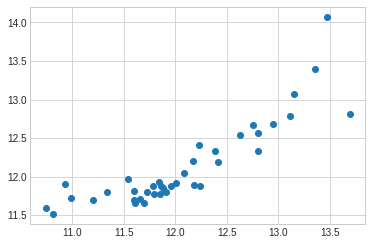

In [125]:
plt.scatter(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


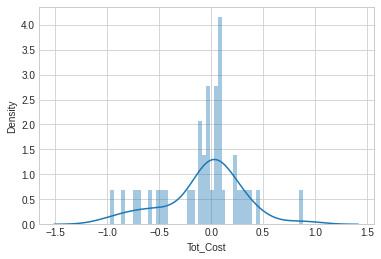

In [126]:
sns.distplot((y_test-predictions), bins = 50)

Feature: 0, Score: 0.14464
Feature: 1, Score: -0.06431
Feature: 2, Score: 0.00116
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00010
Feature: 5, Score: 0.00238
Feature: 6, Score: -0.09105
Feature: 7, Score: 0.10233
Feature: 8, Score: 0.09050
Feature: 9, Score: 0.00068


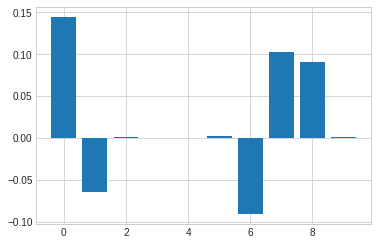

In [127]:
# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [140]:
# Adding a constant to get an intercept
X_train_sm1 = sm.add_constant(x_train)

# Fitting the resgression line using 'OLS'
results = sm.OLS(y_train, X_train_sm1).fit()

# Printing the parameters
print(results.params)

print("======================= Above parameters can define the Final Equation for MH Staff =========================")
print("=============================================================================================================")

# Performing a summary to list out all the different parameters of the regression line fitted
print(results.summary())

const                   11.427768
LENGTH OF STAY - ICU     0.144639
TOTAL LENGTH OF STAY    -0.064312
AGE                      0.001157
COST OF IMPLANT          0.000007
BMI                      0.000103
HB                       0.002376
UNMARRIED               -0.091046
IMPLANT                  0.102330
LENGTH OF STAY- WARD     0.090504
BP-LOW                   0.000676
dtype: float64
======================= Above parameters can define the Final Equation for MH Staff =========================
                            OLS Regression Results                            
Dep. Variable:               Tot_Cost   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     51.89
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.57e-42
Time:                        17:39:30   Log-Likelihood:                 20.144
No. Observations:          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


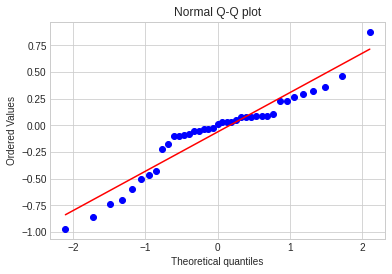

In [128]:
## check normality of the residuals

residual = y_test-predictions

stats.probplot(residual, dist="norm",plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

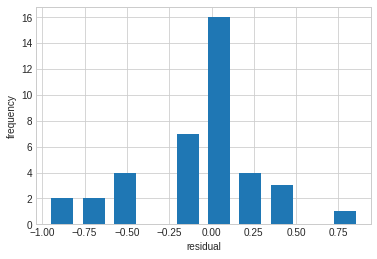

In [129]:
# 1. Checking normality of residuals
hist, bins = np.histogram(residual, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel('frequency')
plt.xlabel('residual')
plt.show()

In [131]:
x_train.columns

Index(['LENGTH OF STAY - ICU', 'TOTAL LENGTH OF STAY', 'AGE',
       'COST OF IMPLANT', 'BMI', 'HB', 'UNMARRIED', 'IMPLANT',
       'LENGTH OF STAY- WARD', 'BP-LOW'],
      dtype='object')

In [130]:
importance

array([ 1.44639077e-01, -6.43123003e-02,  1.15652180e-03,  7.25979796e-06,
        1.02525871e-04,  2.37565033e-03, -9.10460940e-02,  1.02329672e-01,
        9.05037078e-02,  6.76251119e-04])

# Linear Equation from top 5 features

In [144]:
top_5 = ['LENGTH OF STAY - ICU','TOTAL LENGTH OF STAY','AGE','COST OF IMPLANT','BMI','Tot_Cost']

In [145]:
final5 = df[top_5]
train5,test5=train_test_split(final5,test_size=0.2,random_state=2)

x_train5=train5.drop('Tot_Cost',axis=1)
y_train5=train5['Tot_Cost']
x_test5=test5.drop('Tot_Cost',axis=1)
y_test5=test5['Tot_Cost']

In [148]:

#Model
model5 = lm.fit(x_train5, y_train5)
#Prediction
predictions5 = model5.predict(x_test5)

# Adding a constant to get an intercept
X_train_sm5 = sm.add_constant(x_train5)

# Fitting the resgression line using 'OLS'
results = sm.OLS(y_train5, X_train_sm5).fit()

# Printing the parameters
print(results.params)

print("======================= Above parameters can define the Final Equation for MH Staff =========================")
print("=============================================================================================================")

# Performing a summary to list out all the different parameters of the regression line fitted
print(results.summary())

const                   11.396481
LENGTH OF STAY - ICU     0.055034
TOTAL LENGTH OF STAY     0.026257
AGE                      0.002536
COST OF IMPLANT          0.000009
BMI                      0.000917
dtype: float64
======================= Above parameters can define the Final Equation for MH Staff =========================
                            OLS Regression Results                            
Dep. Variable:               Tot_Cost   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     102.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.57e-46
Time:                        17:48:09   Log-Likelihood:                 17.591
No. Observations:                 152   AIC:                            -23.18
Df Residuals:                     146   BIC:                            -5.039
Df Model:                           5  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


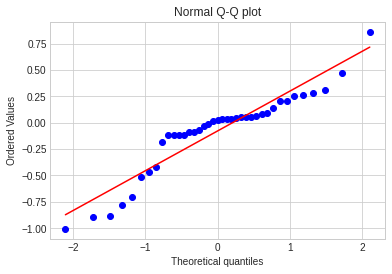

In [149]:
## check normality of the residuals

residual5 = y_test5 - predictions5

stats.probplot(residual5, dist="norm",plot=plt)
plt.title("Normal Q-Q plot")
plt.show()